<a href="https://colab.research.google.com/github/pratikbanik/ML-Heart-Disease-House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have to predict the house prices from the given dataset: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

Importing the Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Processing

In [ ]:
# loading the data from csv file to pandas dataframe
housing_dataset = pd.read_csv('/content/housing.csv')
print("Dataset: housing.csv has been read successfully !")

Dataset: housing.csv has been read successfully !


Inspecting the first 5 rows of the dataframe

In [ ]:
housing_dataset.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Inspecting the last 5 rows of the dataframe

In [ ]:
housing_dataset.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
housing_dataset.shape

(545, 13)

In [ ]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Checking the number of missing values
housing_dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
# Checking the distribution of categorical data
print(housing_dataset['area'].value_counts())
print(housing_dataset['bedrooms'].value_counts())
print(housing_dataset['bathrooms'].value_counts())
print(housing_dataset['stories'].value_counts())
print(housing_dataset['mainroad'].value_counts())
print(housing_dataset['guestroom'].value_counts())
print(housing_dataset['basement'].value_counts())
print(housing_dataset['hotwaterheating'].value_counts())
print(housing_dataset['airconditioning'].value_counts())
print(housing_dataset['parking'].value_counts())
print(housing_dataset['prefarea'].value_counts())
print(housing_dataset['furnishingstatus'].value_counts())

6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: area, Length: 284, dtype: int64
3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64
1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64
2    238
1    227
4     41
3     39
Name: stories, dtype: int64
yes    468
no      77
Name: mainroad, dtype: int64
no     448
yes     97
Name: guestroom, dtype: int64
no     354
yes    191
Name: basement, dtype: int64
no     520
yes     25
Name: hotwaterheating, dtype: int64
no     373
yes    172
Name: airconditioning, dtype: int64
0    299
1    126
2    108
3     12
Name: parking, dtype: int64
no     417
yes    128
Name: prefarea, dtype: int64
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


Encoding the Categorical Data

In [ ]:
# Encoding 'mainroad'
housing_dataset.replace({'mainroad': {'yes': 0, 'no': 1}}, inplace=True)

# Encoding 'guestroom'
housing_dataset.replace({'guestroom': {'yes': 0, 'no': 1}}, inplace=True)

# Encoding 'basement'
housing_dataset.replace({'basement': {'yes': 0, 'no': 1}}, inplace=True)

# Encoding 'hotwaterheating'
housing_dataset.replace({'hotwaterheating': {'yes': 0, 'no': 1}}, inplace=True)

# Encoding 'airconditioning'
housing_dataset.replace({'airconditioning': {'yes': 0, 'no': 1}}, inplace=True)

# Encoding 'prefarea'
housing_dataset.replace({'prefarea': {'yes': 0, 'no': 1}}, inplace=True)

# Encoding 'furnishingstatus'
housing_dataset.replace({'furnishingstatus': {'semi-furnished': 0, 'unfurnished': 1, 'furnished': 2}}, inplace=True)

In [ ]:
housing_dataset.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,2
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,2
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,0
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,2
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,2


<Axes: >

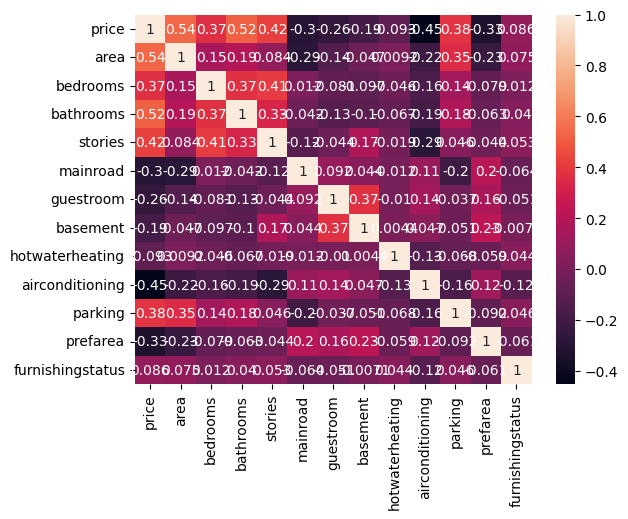

In [ ]:
# prompt: Using dataframe housing_dataset: Generate a heat map

import pandas as pd
import seaborn as sns

corr = housing_dataset.corr()
sns.heatmap(corr, annot=True)

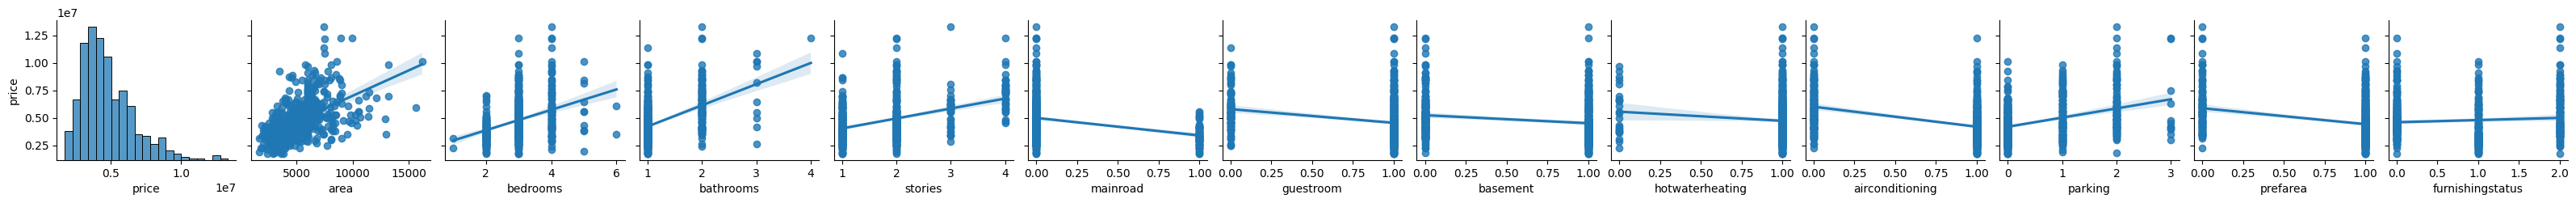

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting features and target variable
features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
            'basement', 'hotwaterheating', 'airconditioning', 'parking',
            'prefarea', 'furnishingstatus']
target = 'price'

# Creating pairplot
sns.pairplot(housing_dataset, x_vars=features, y_vars=[target], kind='reg')

# Displaing the plot
plt.show()

In [ ]:
X = housing_dataset.drop(['area','price'],axis=1)
Y = housing_dataset['price']

In [ ]:
# prompt: print X and Y
print(X)
print(Y)

     bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0           4          2        3         0          1         1   
1           4          4        4         0          1         1   
2           3          2        2         0          1         0   
3           4          2        2         0          1         0   
4           4          1        2         0          0         0   
..        ...        ...      ...       ...        ...       ...   
540         2          1        1         0          1         0   
541         3          1        1         1          1         1   
542         2          1        1         0          1         1   
543         3          1        1         1          1         1   
544         3          1        2         0          1         1   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  1                0        2         0                 2  
1                  1         

Splitting Training and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

Linear Regression Model

In [ ]:
# loading the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)
print('Model training done!')

Model training done!


Model Evaluation uisng the training data

In [ ]:
# prediction on Training data X_train
training_data_prediction = lin_reg_model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6043880587058138


$R^2$ error = 1 - $\Sigma(y_i - \hat y_i)^2 / \Sigma(y_i - \bar y)^2$

$y_i$  is the Y_traing[],

$\hat y_i$ is the training_data_prediction[]

Visualize the actual prices and Predicted prices using training data

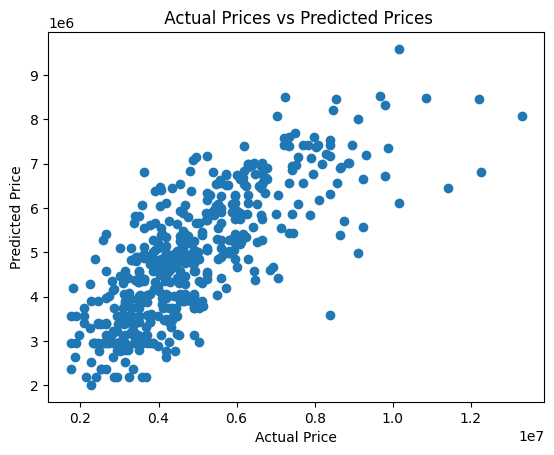

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Model Evaluation uisng the test data

In [ ]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6505911439321368


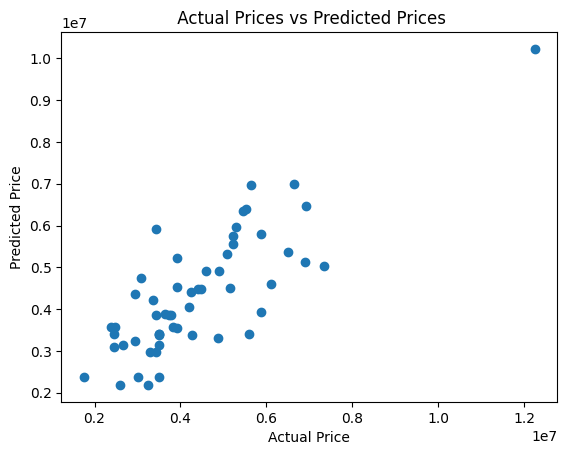

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prompt: now using the model to predict house price and ask the user for feature values

# Get user input for house features
area = float(input("Enter area size: "))
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))
stories = int(input("Enter the number of stories: "))
mainroad = input("Enter if looking for mainroad (yes/no): ")
guestroom = input("Enter if looking for guestroom (yes/no): ")
basement = input("Enter if looking for basement (yes/no): ")
hotwaterheating = input("Enter if looking for hotwaterheating (yes/no): ")
airconditioning = input("Enter if looking for airconditioning (yes/no): ")
parking = int(input("Enter the number of parking required: "))
prefarea = input("Enter if looking for prefarea (yes/no): ")
furnishingstatus = input("Enter your furnishingstatus (semi-furnished/unfurnished/furnished): ")

# Encoding 'mainroad'
mainroad_encoded = 0 if mainroad.lower() == 'yes' else 1

# Encoding 'guestroom'
guestroom_encoded = 0 if guestroom.lower() == 'yes' else 1

# Encoding 'basement'
basement_encoded = 0 if basement.lower() == 'yes' else 1

# Encoding 'hotwaterheating'
hotwaterheating_encoded = 0 if hotwaterheating.lower() == 'yes' else 1

# Encoding 'airconditioning'
airconditioning_encoded = 0 if airconditioning.lower() == 'yes' else 1

# Encoding 'prefarea'
prefarea_encoded = 0 if prefarea.lower() == 'yes' else 1

# Encoding 'furnishingstatus'
furnishingstatus_encoded = {'semi-furnished': 0, 'unfurnished': 1, 'furnished': 2}.get(furnishingstatus.lower())

# Create a new data point
new_data_point = [bedrooms, bathrooms, stories, mainroad_encoded, guestroom_encoded,
                  basement_encoded, hotwaterheating_encoded, airconditioning_encoded,
                  parking, prefarea_encoded, furnishingstatus_encoded]

# Predict the house price
house_price = lin_reg_model.predict([new_data_point])

# Print the predicted house price
print(f"Predicted house price of {area}: {house_price[0]}")


Enter area size: 7420
Enter the number of bedrooms: 4
Enter the number of bathrooms: 4
Enter the number of stories: 3
Enter if looking for mainroad (yes/no): yes
Enter if looking for guestroom (yes/no): yes
Enter if looking for basement (yes/no): yes
Enter if looking for hotwaterheating (yes/no): yes
Enter if looking for airconditioning (yes/no): yes
Enter the number of parking required: 3
Enter if looking for prefarea (yes/no): yes
Enter your furnishingstatus (semi-furnished/unfurnished/furnished): furnished
Predicted house price of 7420.0: 12423592.880808566


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Applying alternative ML algorithms or cognizer

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Lasso Regression Model
lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train,Y_train)
print('Lasso Regression Model training done!')

# Ridge Regression Model
from sklearn.linear_model import Ridge
ridge_reg_model = Ridge()
ridge_reg_model.fit(X_train,Y_train)
print('Ridge Regression Model training done!')

# K-Neighbors Regressor Model
from sklearn.neighbors import KNeighborsRegressor
knn_reg_model = KNeighborsRegressor()
knn_reg_model.fit(X_train,Y_train)
print('K-Neighbors Regressor Model training done!')

# Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg_model = DecisionTreeRegressor()
decision_tree_reg_model.fit(X_train,Y_train)
print('Decision Tree Regressor Model training done!')

# Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
random_forest_reg_model = RandomForestRegressor()
random_forest_reg_model.fit(X_train,Y_train)
print('Random Forest Regressor Model training done!')

# ElasticNet Regression Model
from sklearn.linear_model import ElasticNet
elastic_net_reg_model = ElasticNet()
elastic_net_reg_model.fit(X_train,Y_train)
print('ElasticNet Regression Model training done!')


# prompt: write code to evaluate the test and train accuracies of the models

# Evaluate the models using the test data
lasso_test_score = lasso_reg_model.score(X_test, Y_test)
ridge_test_score = ridge_reg_model.score(X_test, Y_test)
knn_test_score = knn_reg_model.score(X_test, Y_test)
decision_tree_test_score = decision_tree_reg_model.score(X_test, Y_test)
random_forest_test_score = random_forest_reg_model.score(X_test, Y_test)
elastic_net_test_score = elastic_net_reg_model.score(X_test, Y_test)

# Evaluate the models using the training data
lasso_train_score = lasso_reg_model.score(X_train, Y_train)
ridge_train_score = ridge_reg_model.score(X_train, Y_train)
knn_train_score = knn_reg_model.score(X_train, Y_train)
decision_tree_train_score = decision_tree_reg_model.score(X_train, Y_train)
random_forest_train_score = random_forest_reg_model.score(X_train, Y_train)
elastic_net_train_score = elastic_net_reg_model.score(X_train, Y_train)

# Print the test and train scores for each model
print("Model\t\tTest Score\tTrain Score")
print("Linear Regression\t{:.4f}\t\t{:.4f}".format(lin_reg_model.score(X_test, Y_test), lin_reg_model.score(X_train, Y_train)))
print("Lasso Regression\t{:.4f}\t\t{:.4f}".format(lasso_test_score, lasso_train_score))
print("Ridge Regression\t{:.4f}\t\t{:.4f}".format(ridge_test_score, ridge_train_score))
print("K-Neighbors Regressor\t{:.4f}\t\t{:.4f}".format(knn_test_score, knn_train_score))
print("Decision Tree Regressor\t{:.4f}\t\t{:.4f}".format(decision_tree_test_score, decision_tree_train_score))
print("Random Forest Regressor\t{:.4f}\t\t{:.4f}".format(random_forest_test_score, random_forest_train_score))
print("ElasticNet Regression\t{:.4f}\t\t{:.4f}".format(elastic_net_test_score, elastic_net_train_score))

Lasso Regression Model training done!
Ridge Regression Model training done!
K-Neighbors Regressor Model training done!
Decision Tree Regressor Model training done!
Random Forest Regressor Model training done!
ElasticNet Regression Model training done!
Model		Test Score	Train Score
Linear Regression	0.6506		0.6044
Lasso Regression	0.6506		0.6044
Ridge Regression	0.6516		0.6043
K-Neighbors Regressor	0.4755		0.6626
Decision Tree Regressor	0.3421		0.9492
Random Forest Regressor	0.4977		0.9052
ElasticNet Regression	0.5407		0.4664
